In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [ ]:
def load_dataset():
    train_ds = h5py.File('/content/train_catvnoncat.h5', 'r')
    train_set_x = np.array(train_ds['train_set_x'][:])
    train_set_y = np.array(train_ds['train_set_y'][:])
    
    test_ds = h5py.File('/content/test_catvnoncat.h5', 'r')
    test_set_x = np.array(test_ds['test_set_x'][:])
    test_set_y = np.array(test_ds['test_set_y'][:])
    
    classes = np.array(test_ds['list_classes'][:])
    
    train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
    test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
    
    return train_set_x, train_set_y, test_set_x, test_set_y, classes

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


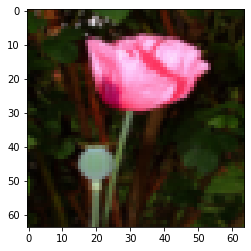

In [ ]:
index = 30
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [1], it's a 'cat' picture.


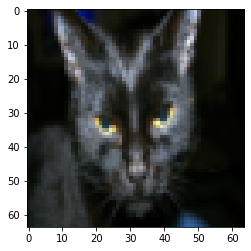

In [ ]:
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [ ]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [ ]:
def sigmoid(z):
  s = 1 / (1 + np.exp(-z))
  return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [ ]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1), dtype=np.float32)
    b = 0.0
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


In [ ]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # forward propagation (from x to cost)
    # compute activation
    A = sigmoid(w.T @ X + b)
    # compute cost by using np.dot to perform multiplication
    cost = np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / -m
    
    # backward propagation (to find grad)
    dw = X @ (A - Y).T / m
    db = np.sum(A - Y) / m
    
    cost = np.squeeze(np.array(cost))
    
    grads = {'dw': dw, 'db': db}
    return grads, cost

In [ ]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

In [ ]:
assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64

In [ ]:
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.12500404500439652
cost = 0.15900537707692405


In [ ]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
  w = copy.deepcopy(w)
  b = copy.deepcopy(b)
    
  costs = []

  for i in range(num_iterations):
    grads, cost = propagate(w, b, X, Y)
    dw = grads["dw"]
    db = grads["db"]
    w -= learning_rate * dw
    b -= learning_rate * db
        
        # Record the costs
    if i % 100 == 0:
      costs.append(cost)
        
            # Print the cost every 100 training iterations
    if print_cost:
      print ("Cost after iteration %i: %f" %(i, cost))
    
  params = {"w": w,
            "b": b}
  grads = {"dw": dw,
           "db": db}

  return params, grads, costs


In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]


In [ ]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # compute vector 'A' predicting the probabilities of a cat being present in the picture
    A = sigmoid(w.T @ X + b)
    
    for i in range(A.shape[1]):
        # convert probabilities A[0, i] to actual predictions p[0, i]
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
            
    return Y_prediction

In [ ]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(dim=X_train.shape[0])
    
    # Gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "params"
    w = params['w']
    b = params['b']
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
logistic_regressionn_model = model(train_set_x, 
                                  train_set_y, 
                                  test_set_x, 
                                  test_set_y, 
                                  num_iterations=2000, 
                                  learning_rate=0.005, 
                                  print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 1: 0.741029
Cost after iteration 2: 0.753154
Cost after iteration 3: 0.866709
Cost after iteration 4: 0.768564
Cost after iteration 5: 0.897014
Cost after iteration 6: 0.755613
Cost after iteration 7: 0.880437
Cost after iteration 8: 0.751485
Cost after iteration 9: 0.877133
Cost after iteration 10: 0.744940
Cost after iteration 11: 0.869479
Cost after iteration 12: 0.739538
Cost after iteration 13: 0.863181
Cost after iteration 14: 0.734114
Cost after iteration 15: 0.856499
Cost after iteration 16: 0.728988
Cost after iteration 17: 0.849995
Cost after iteration 18: 0.724030
Cost after iteration 19: 0.843519
Cost after iteration 20: 0.719249
Cost after iteration 21: 0.837130
Cost after iteration 22: 0.714618
Cost after iteration 23: 0.830820
Cost after iteration 24: 0.710124
Cost after iteration 25: 0.824597
Cost after iteration 26: 0.705753
Cost after iteration 27: 0.818463
Cost after iteration 28: 0.701493
Cost after iteration 29:

In [ ]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # compute vector 'A' predicting the probabilities of a cat being present in the picture
    A = sigmoid(w.T @ X + b)
    
    for i in range(A.shape[1]):
        # convert probabilities A[0, i] to actual predictions p[0, i]
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
            
    return Y_prediction

In [ ]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(dim=X_train.shape[0])
    
    # Gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "params"
    w = params['w']
    b = params['b']
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 1: 0.741029
Cost after iteration 2: 0.753154
Cost after iteration 3: 0.866709
Cost after iteration 4: 0.768564
Cost after iteration 5: 0.897014
Cost after iteration 6: 0.755613
Cost after iteration 7: 0.880437
Cost after iteration 8: 0.751485
Cost after iteration 9: 0.877133
Cost after iteration 10: 0.744940
Cost after iteration 11: 0.869479
Cost after iteration 12: 0.739538
Cost after iteration 13: 0.863181
Cost after iteration 14: 0.734114
Cost after iteration 15: 0.856499
Cost after iteration 16: 0.728988
Cost after iteration 17: 0.849995
Cost after iteration 18: 0.724030
Cost after iteration 19: 0.843519
Cost after iteration 20: 0.719249
Cost after iteration 21: 0.837130
Cost after iteration 22: 0.714618
Cost after iteration 23: 0.830820
Cost after iteration 24: 0.710124
Cost after iteration 25: 0.824597
Cost after iteration 26: 0.705753
Cost after iteration 27: 0.818463
Cost after iteration 28: 0.701493
Cost after iteration 29:

y = 0, you predicted that it is a "non-cat" picture.


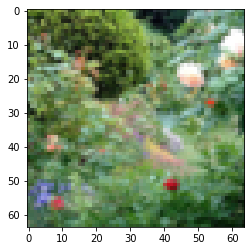

In [ ]:
index = 49
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

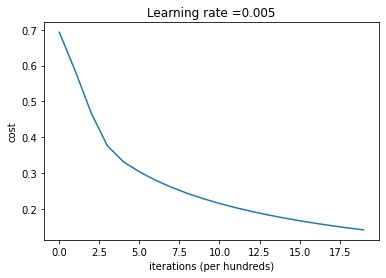

In [ ]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



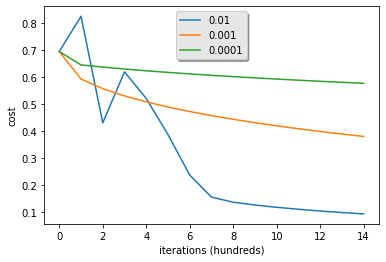

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()